In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from shapely.geometry  import Point, LineString, MultiLineString

In [2]:
ABEL_NOBLE_COEF = 0.00769              # [m3.kg-1]
H2_GAMMA        = 1.4                  # [-]
R_GAS           = 8.31446261815324     # [J.K-1.mol-1]
M_H2            = 0.002016             # [kg.mol-1]
R_H2            = R_GAS / M_H2         # [J.K-1.kg-1]
Cp_H2           = 14310                # [J.kg-1.K-1] 

K               = 0.5
D               = 0.001                # [m]
L               = 0.001                # [m]

D               = 0.00075              # [m]
L               = 0.015                # [m]

f               = 0.049
F               = f*L/D

T1              = 300                  # [K]
P1              = 400e5                # [Pa]

In [3]:
TANK_TEMP = T1
TANK_PRES = P1

https://stackoverflow.com/questions/78585523/python-solving-non-linear-system-of-equations-issue-with-sqrt

In [4]:
def equations10(p):
    u3, T3 = p;
    return np.array([
        (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (np.sqrt((R_H2 * T3) / H2_GAMMA)  + ((K + F) / 4) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - ((u3**2) / 2) * ((F / 4) + 1) )) + u3 * ((F / 4) + 1)) - TANK_PRES,
        (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (((R_H2 * (TANK_TEMP - (TANK_TEMP - T3 - ((u3**2) / (2 * Cp_H2)) * ((F / 4) + 1)) * ((K + 1) / K))) / (np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - (u3**2 / 2) * ((F / 4) + 1))) - u3 + np.sqrt(H2_GAMMA * R_H2 * T3))) + ((K / 4) + 1) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - (u3**2 / 2) * ((F / 4) + 1)))) - TANK_PRES
    ])

In [5]:
u = np.linspace(0, 1500, 200)   # Velocity [m.s-1]
t = np.linspace(0, 500, 200)    # Temperature [K]
u = np.linspace(1200, 1400, 500)   # Velocity [m.s-1]
t = np.linspace(200, 260, 500)    # Temperature [K]
#u = np.linspace(1300, 1325, 500)   # Velocity [m.s-1]
#t = np.linspace(230, 240, 500)    # Temperature [K]
U, T = np.meshgrid(u, t)
X, Y = equations10([U, T])

/tmp/ipykernel_4388/3210126654.py:4: RuntimeWarning: invalid value encountered in sqrt
  (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (np.sqrt((R_H2 * T3) / H2_GAMMA)  + ((K + F) / 4) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - ((u3**2) / 2) * ((F / 4) + 1) )) + u3 * ((F / 4) + 1)) - TANK_PRES,
/tmp/ipykernel_4388/3210126654.py:5: RuntimeWarning: invalid value encountered in sqrt
  (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (((R_H2 * (TANK_TEMP - (TANK_TEMP - T3 - ((u3**2) / (2 * Cp_H2)) * ((F / 4) + 1)) * ((K + 1) / K))) / (np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - (u3**2 / 2) * ((F / 4) + 1))) - u3 + np.sqrt(H2_GAMMA * R_H2 * T3))) + ((K / 4) + 1) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - (u3**2 / 2) * ((F / 4) + 1)))) - TANK_PRES


In [6]:
U, T = np.meshgrid(u, t)

In [7]:
X, Y = equations10([U, T])

/tmp/ipykernel_4388/3210126654.py:4: RuntimeWarning: invalid value encountered in sqrt
  (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (np.sqrt((R_H2 * T3) / H2_GAMMA)  + ((K + F) / 4) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - ((u3**2) / 2) * ((F / 4) + 1) )) + u3 * ((F / 4) + 1)) - TANK_PRES,
/tmp/ipykernel_4388/3210126654.py:5: RuntimeWarning: invalid value encountered in sqrt
  (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (((R_H2 * (TANK_TEMP - (TANK_TEMP - T3 - ((u3**2) / (2 * Cp_H2)) * ((F / 4) + 1)) * ((K + 1) / K))) / (np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - (u3**2 / 2) * ((F / 4) + 1))) - u3 + np.sqrt(H2_GAMMA * R_H2 * T3))) + ((K / 4) + 1) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - (u3**2 / 2) * ((F / 4) + 1)))) - TANK_PRES


In [8]:
levels = np.linspace(-3e6, 3e6, 21)
levels

array([-3000000., -2700000., -2400000., -2100000., -1800000., -1500000.,
       -1200000.,  -900000.,  -600000.,  -300000.,        0.,   300000.,
         600000.,   900000.,  1200000.,  1500000.,  1800000.,  2100000.,
        2400000.,  2700000.,  3000000.])

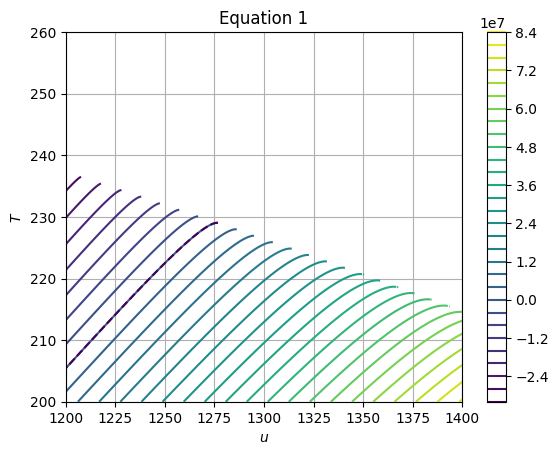

In [9]:
fig, axe = plt.subplots()
caxe = axe.contour(U, T, X, 30)
axe.contour(U, T, X, [0], linestyles="--")
cbar = fig.colorbar(caxe)
axe.set_title('Equation 1')
axe.set_xlabel("$u$")
axe.set_ylabel("$T$")
axe.grid()

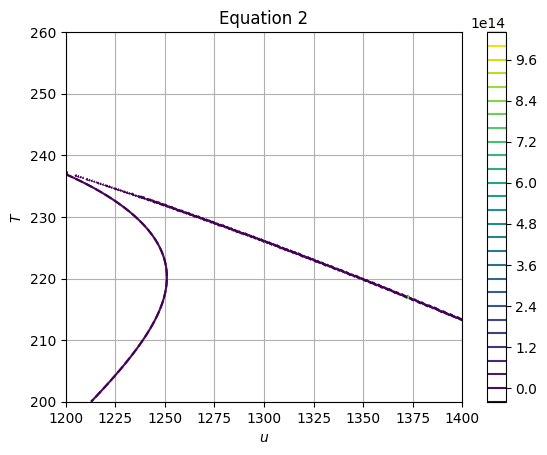

In [10]:
fig, axe = plt.subplots()
caxe = axe.contour(U, T, Y, 30)
axe.contour(U, T, Y, [0], linestyles="--")
cbar = fig.colorbar(caxe)
axe.set_title('Equation 2')
axe.set_xlabel("$u$")
axe.set_ylabel("$T$")
axe.grid()

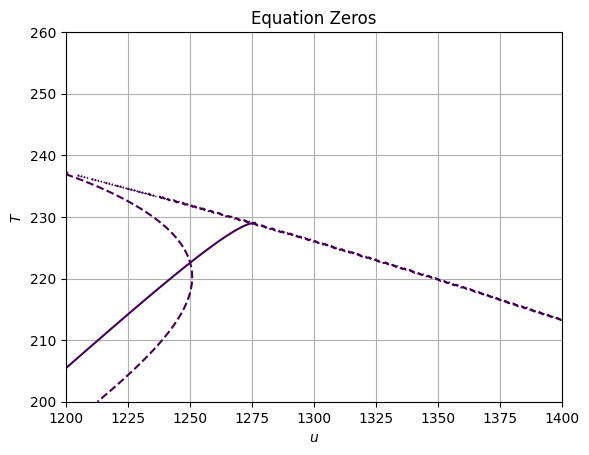

In [11]:
fig, axe = plt.subplots()
c1 = axe.contour(U, T, X, [0], linestyles="-")
c2 = axe.contour(U, T, Y, [0], linestyles="--")
axe.set_title('Equation Zeros')
axe.set_xlabel("$u$")
axe.set_ylabel("$T$")
axe.grid()

In [12]:
def get_curve(contour):
    curve = MultiLineString([
        LineString(path.vertices) for path in contour.collections[0].get_paths()
    ])
    return curve

In [13]:
C1 = get_curve(c1)
C2 = get_curve(c2)

In [14]:
sol = C1.intersection(C2)

In [15]:
#sol.geoms[2].coords[:]

In [16]:
sol1 = optimize.fsolve(equations10, x0=[1275, 220])
sol1

array([1250.20118685,  222.56397776])

In [17]:
sol2 = optimize.fsolve(equations10, x0=[1225, 210])
sol2

/tmp/ipykernel_4388/3210126654.py:4: RuntimeWarning: invalid value encountered in sqrt
  (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (np.sqrt((R_H2 * T3) / H2_GAMMA)  + ((K + F) / 4) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - ((u3**2) / 2) * ((F / 4) + 1) )) + u3 * ((F / 4) + 1)) - TANK_PRES,
/tmp/ipykernel_4388/3210126654.py:5: RuntimeWarning: invalid value encountered in sqrt
  (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (((R_H2 * (TANK_TEMP - (TANK_TEMP - T3 - ((u3**2) / (2 * Cp_H2)) * ((F / 4) + 1)) * ((K + 1) / K))) / (np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - (u3**2 / 2) * ((F / 4) + 1))) - u3 + np.sqrt(H2_GAMMA * R_H2 * T3))) + ((K / 4) + 1) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - (u3**2 / 2) * ((F / 4) + 1)))) - TANK_PRES
/tmp/ipykernel_4388/1477845239.py:1: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  sol2 = 

array([1225.,  210.])

In [18]:
sol3 = optimize.fsolve(equations10, x0=[1314, 238.5])
sol3

/tmp/ipykernel_4388/3210126654.py:4: RuntimeWarning: invalid value encountered in sqrt
  (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (np.sqrt((R_H2 * T3) / H2_GAMMA)  + ((K + F) / 4) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - ((u3**2) / 2) * ((F / 4) + 1) )) + u3 * ((F / 4) + 1)) - TANK_PRES,
/tmp/ipykernel_4388/3210126654.py:5: RuntimeWarning: invalid value encountered in sqrt
  (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (((R_H2 * (TANK_TEMP - (TANK_TEMP - T3 - ((u3**2) / (2 * Cp_H2)) * ((F / 4) + 1)) * ((K + 1) / K))) / (np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - (u3**2 / 2) * ((F / 4) + 1))) - u3 + np.sqrt(H2_GAMMA * R_H2 * T3))) + ((K / 4) + 1) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - (u3**2 / 2) * ((F / 4) + 1)))) - TANK_PRES
/tmp/ipykernel_4388/1724437486.py:1: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  sol3 = 

array([1314. ,  238.5])

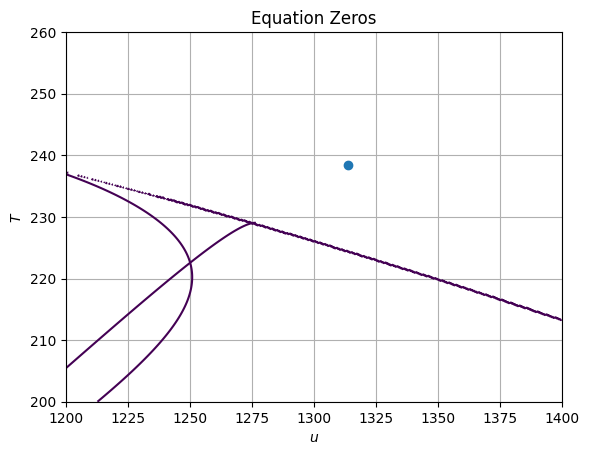

In [19]:
fig, axe = plt.subplots()
axe.contour(U, T, X, [0], linestyles="-")
axe.contour(U, T, Y, [0], linestyles="-")
#axe.scatter(*sol1)
#axe.scatter(*sol2)
axe.scatter(*sol3)
axe.set_title('Equation Zeros')
axe.set_xlabel("$u$")
axe.set_ylabel("$T$")
axe.grid()

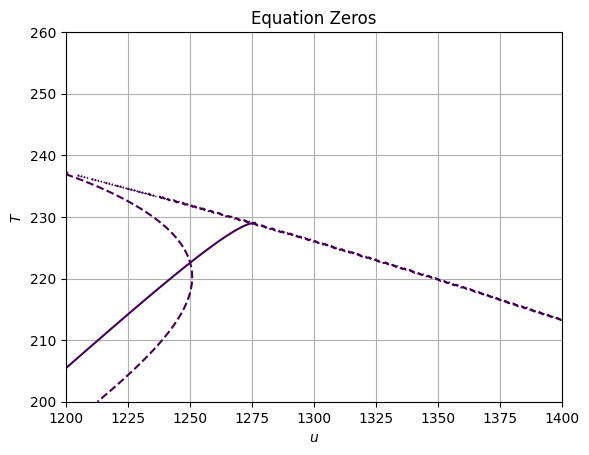

In [20]:
fig, axe = plt.subplots()
axe.contour(U, T, X, [0], linestyles="-")
axe.contour(U, T, Y, [0], linestyles="--")
axe.set_title('Equation Zeros')
axe.set_xlabel("$u$")
axe.set_ylabel("$T$")
axe.grid()

In [21]:
equations10([1e-8, 1e-8])

array([-40001515.03489727, -40004016.45356692])